In [6]:

%matplotlib inline
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr
import tensorflow as tf

import matplotlib.pyplot as plt
from pathlib import Path
from shutil import copyfile, move
from mpl_finance import candlestick2_ochl

Using TensorFlow backend.


In [33]:
df = fdr.DataReader("KS11","2019")
y=np.where(df["Change"].shift(-1).dropna()>0,1,0)

inputs= df
inputs

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2009-01-02,1157.40,1132.87,1157.40,1118.84,340780000.0,0.0293
2009-01-05,1173.57,1180.98,1185.22,1166.66,414760000.0,0.0140
2009-01-06,1194.28,1183.52,1203.59,1179.94,444200000.0,0.0176
2009-01-07,1228.17,1198.85,1228.56,1195.20,568560000.0,0.0284
2009-01-08,1205.70,1212.70,1218.43,1195.15,472340000.0,-0.0183
...,...,...,...,...,...,...
2020-02-03,2118.88,2086.61,2126.73,2082.74,827340.0,-0.0001
2020-02-04,2157.90,2121.22,2162.32,2120.53,616270.0,0.0184
2020-02-05,2165.63,2177.26,2181.52,2154.88,563120.0,0.0036


In [36]:
df=pd.read_csv('kospi.csv')
df=df.reset_index(inplace=True)
print(df)

            Date    Close     Open     High      Low       Volume  Change
0     2009-01-02  1157.40  1132.87  1157.40  1118.84  340780000.0  0.0293
1     2009-01-05  1173.57  1180.98  1185.22  1166.66  414760000.0  0.0140
2     2009-01-06  1194.28  1183.52  1203.59  1179.94  444200000.0  0.0176
3     2009-01-07  1228.17  1198.85  1228.56  1195.20  568560000.0  0.0284
4     2009-01-08  1205.70  1212.70  1218.43  1195.15  472340000.0 -0.0183
...          ...      ...      ...      ...      ...          ...     ...
2740  2020-02-03  2118.88  2086.61  2126.73  2082.74     827340.0 -0.0001
2741  2020-02-04  2157.90  2121.22  2162.32  2120.53     616270.0  0.0184
2742  2020-02-05  2165.63  2177.26  2181.52  2154.88     563120.0  0.0036
2743  2020-02-06  2227.94  2184.77  2229.99  2182.25     683230.0  0.0288
2744  2020-02-07  2211.95  2221.49  2223.92  2198.14     766710.0 -0.0072

[2745 rows x 7 columns]


In [5]:
df = fdr.DataReader("KS11","2009")
y=np.where(df["Change"].shift(-1).dropna()>0,1,0)

df=pd.read_csv('kospi.csv')
inputs=df.set_index("Date")

seq_len = 20
dimension = 48

figures, labels = ohlc2cs(inputs, seq_len, dimension)

figures = figures/255.0

setlen = int(len(df) * 0.7)
X_train,X_test,Y_train,Y_test = figures[:setlen],figures[setlen:],np.array(labels[:setlen]),np.array(labels[setlen:])

NameError: name 'ohlc2cs' is not defined

In [97]:
df = fdr.DataReader("KS11","2020")
fig = plt.figure(figsize=(1,1),dpi=48)
ax1 = fig.add_subplot(1,1,1)
candlestick2_ochl(ax1, df['Open'], df['Close'], df['High'],df['Low'], width=1,colorup='#77d879', colordown='#db3f3f')
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.axis('off')

fig.canvas.draw()
fig_np = np.array(fig.canvas.renderer._renderer)
figs = np.zeros((len(df)-1, 48,48, 3))
figs[0] = fig_np[:,:,:3]
plt.close(fig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


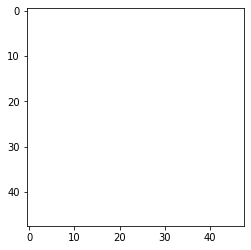

In [98]:
plt.imshow(figs[0])

In [84]:
fig_np = np.array(fig.canvas.renderer._renderer)

In [62]:
fig_np[:,:,:3]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [71]:
df.ix[0:20,:]

C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,488610.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,622530.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,587470.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,559330.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,899620.0,-0.0111
2020-01-09,2186.45,2182.20,2186.45,2172.16,583330.0,0.0163
2020-01-10,2206.39,2189.48,2206.92,2188.10,584150.0,0.0091
2020-01-13,2229.26,2204.49,2230.43,2204.49,480210.0,0.0104
2020-01-14,2238.88,2243.06,2250.79,2232.94,823050.0,0.0043


In [73]:
df[0:20]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,488610.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,622530.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,587470.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,559330.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,899620.0,-0.0111
2020-01-09,2186.45,2182.20,2186.45,2172.16,583330.0,0.0163
2020-01-10,2206.39,2189.48,2206.92,2188.10,584150.0,0.0091
2020-01-13,2229.26,2204.49,2230.43,2204.49,480210.0,0.0104
2020-01-14,2238.88,2243.06,2250.79,2232.94,823050.0,0.0043
